# Sentimental Analysis 

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [4]:
df = pd.read_csv('df_musk_2022.csv')

In [5]:
df

,Unnamed: 0,Text,Date_New
0,0,the bird is freed,2022-10-28
1,1,Falcon rockets to orbit as seen from LA https:...,2022-10-28
2,2,@Gfilche @Twitter 🤣,2022-10-27
3,3,@PeterSchiff 🤣 thanks,2022-10-27
4,4,@ZubyMusic Absolutely,2022-10-27
...,...,...,...
3130,3130,https://t.co/LA9hPzVlGx,2022-01-02
3131,3131,Let’s make the roaring 20’s happen!,2022-01-02
3132,3132,Great work by Tesla team worldwide! https://t....,2022-01-02
3133,3133,@BLKMDL3 @Tesla 🔥,2022-01-01


In [6]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
df

,Text,Date_New
0,the bird is freed,2022-10-28
1,Falcon rockets to orbit as seen from LA https:...,2022-10-28
2,@Gfilche @Twitter 🤣,2022-10-27
3,@PeterSchiff 🤣 thanks,2022-10-27
4,@ZubyMusic Absolutely,2022-10-27
...,...,...
3130,https://t.co/LA9hPzVlGx,2022-01-02
3131,Let’s make the roaring 20’s happen!,2022-01-02
3132,Great work by Tesla team worldwide! https://t....,2022-01-02
3133,@BLKMDL3 @Tesla 🔥,2022-01-01


## NLKT

In [8]:
#pip install nltk

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      3135 non-null   object
 1   Date_New  3135 non-null   object
dtypes: object(2)
memory usage: 49.1+ KB


### Length of each tweet

In [10]:
df['length'] = list(map(lambda x: len(str(x).split()), df['Text']))

In [11]:
df.head()

,Text,Date_New,length
0,the bird is freed,2022-10-28,4
1,Falcon rockets to orbit as seen from LA https:...,2022-10-28,9
2,@Gfilche @Twitter 🤣,2022-10-27,3
3,@PeterSchiff 🤣 thanks,2022-10-27,3
4,@ZubyMusic Absolutely,2022-10-27,2


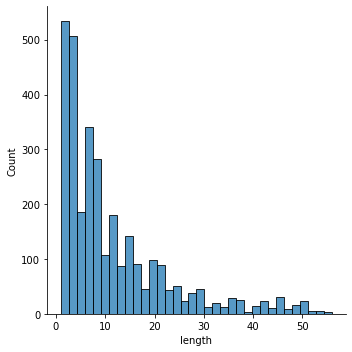

In [12]:
sns.displot(x=df['length'])

In [13]:
df['length'].describe()

count    3135.000000
mean       11.510686
std        11.265709
min         1.000000
25%         3.000000
50%         8.000000
75%        15.000000
max        56.000000
Name: length, dtype: float64

In [14]:
#meadian of tweets length
m = df['length'].median()
m

8.0

In [176]:
#Creating a list with tweets
tweets = ['']
corpus=[]
for tweet in df['Text']:
    tweets.append(tweet)
    corpus.append(nltk.sent_tokenize(tweet))

In [177]:
corpus

[['the bird is freed'],
 ['Falcon rockets to orbit as seen from LA https://t.co/r8L2SbLC3p'],
 ['@Gfilche @Twitter 🤣'],
 ['@PeterSchiff 🤣 thanks'],
 ['@ZubyMusic Absolutely'],
 ['Dear Twitter Advertisers https://t.co/GMwHmInPAS'],
 ['@BillyM2k 👻'],
 ['Meeting a lot of cool people at Twitter today!'],
 ['Entering Twitter HQ – let that sink in!', 'https://t.co/D68z4K2wq7'],
 ['@dogeofficialceo @mtaibbi 🤣💪'],
 ['@mtaibbi 🤣'],
 ['@ARodTV Definitely closer to citizen journalism – local news orgs are under-appreciated &amp; should get way more prominence on Twitter'],
 ['@sandyleevincent Nobody bats 1000 🤷\u200d♂️'],
 ['A beautiful thing about Twitter is how it empowers citizen journalism – people are able to disseminate news without an establishment bias'],
 ['@teslaownersSV I’m a big fan of citizen journalism!'],
 ['“According to unnamed sources close to the matter who wish to remain anonymous” 🤣🤣'],
 ['“The New York Times has emerged as a new, chaotic actor in global politics.',
  'The pa

In [178]:
## flatten the list
corpus=[sent for sublist in corpus for sent in sublist]

In [179]:
#Cleaning the list
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'(@[a-z0-9+._-]+)'," ", corpus[i]) # Replace @users by ' '
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()

In [180]:
corpus

['the bird is freed',
 'falcon rockets to orbit as seen from la https t co r l sblc p',
 '',
 'thanks',
 'absolutely',
 'dear twitter advertisers https t co gmwhminpas',
 '',
 'meeting a lot of cool people at twitter today',
 'entering twitter hq let that sink in',
 'https t co d z k wq',
 '',
 '',
 'definitely closer to citizen journalism local news orgs are under appreciated amp should get way more prominence on twitter',
 'nobody bats',
 'a beautiful thing about twitter is how it empowers citizen journalism people are able to disseminate news without an establishment bias',
 'i m a big fan of citizen journalism',
 'according to unnamed sources close to the matter who wish to remain anonymous',
 'the new york times has emerged as a new chaotic actor in global politics',
 'the paper s interventions in some of the world s most combustible conflicts have sometimes been a boon but their messaging has also caused problems',
 '',
 'yes',
 'is a lot',
 'concerning',
 'works on any moving la

### Tokenizing the corpus

In [181]:
#Creating a dict with words an its freq
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [182]:
len(list(wordfreq.keys()))

6025

In [183]:
wordfreq.keys()

dict_keys(['the', 'bird', 'is', 'freed', 'falcon', 'rockets', 'to', 'orbit', 'as', 'seen', 'from', 'la', 'https', 't', 'co', 'r', 'l', 'sblc', 'p', 'thanks', 'absolutely', 'dear', 'twitter', 'advertisers', 'gmwhminpas', 'meeting', 'a', 'lot', 'of', 'cool', 'people', 'at', 'today', 'entering', 'hq', 'let', 'that', 'sink', 'in', 'd', 'z', 'k', 'wq', 'definitely', 'closer', 'citizen', 'journalism', 'local', 'news', 'orgs', 'are', 'under', 'appreciated', 'amp', 'should', 'get', 'way', 'more', 'prominence', 'on', 'nobody', 'bats', 'beautiful', 'thing', 'about', 'how', 'it', 'empowers', 'able', 'disseminate', 'without', 'an', 'establishment', 'bias', 'i', 'm', 'big', 'fan', 'according', 'unnamed', 'sources', 'close', 'matter', 'who', 'wish', 'remain', 'anonymous', 'new', 'york', 'times', 'has', 'emerged', 'chaotic', 'actor', 'global', 'politics', 'paper', 's', 'interventions', 'some', 'world', 'most', 'combustible', 'conflicts', 'have', 'sometimes', 'been', 'boon', 'but', 'their', 'messaging

In [184]:
#remove words with lenght less than 2, but keeping 'ok'
wordfreq = dict((key,wordfreq[key]) for key in w if len(key)>2 or key== 'ok')

In [185]:
len(list(wordfreq.keys()))

5787

In [186]:
#Reduce the corpus by removung stopwords

from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))

In [187]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [188]:
#Cleaning stop words (i.e : you vs you're)
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [189]:
#drop stop words from bag
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [190]:
#sotring corpus list by freq
corpus.sort(reverse = True)
corpus

[(400, 'https'),
 (282, 'amp'),
 (153, 'tesla'),
 (103, 'would'),
 (102, 'good'),
 (100, 'twitter'),
 (100, 'people'),
 (83, 'yes'),
 (81, 'much'),
 (80, 'starlink'),
 (76, 'one'),
 (75, 'true'),
 (69, 'many'),
 (68, 'like'),
 (67, 'even'),
 (66, 'great'),
 (62, 'time'),
 (61, 'also'),
 (55, 'yeah'),
 (55, 'exactly'),
 (52, 'spacex'),
 (52, 'next'),
 (52, 'make'),
 (51, 'year'),
 (51, 'think'),
 (50, 'still'),
 (50, 'haha'),
 (49, 'maybe'),
 (48, 'high'),
 (45, 'probably'),
 (44, 'team'),
 (43, 'years'),
 (43, 'work'),
 (43, 'far'),
 (42, 'earth'),
 (41, 'right'),
 (41, 'car'),
 (40, 'lot'),
 (40, 'day'),
 (38, 'way'),
 (38, 'russia'),
 (38, 'real'),
 (38, 'life'),
 (38, 'better'),
 (37, 'world'),
 (35, 'ukraine'),
 (34, 'get'),
 (34, 'beta'),
 (34, 'actually'),
 (33, 'times'),
 (33, 'long'),
 (32, 'orbit'),
 (32, 'future'),
 (31, 'working'),
 (31, 'first'),
 (31, 'best'),
 (30, 'need'),
 (30, 'know'),
 (30, 'big'),
 (30, 'almost'),
 (29, 'ok'),
 (29, 'hard'),
 (29, 'fsd'),
 (28, 'yup'

In [191]:
len(corpus)

5680

### Stemming

In [192]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus = [(lem.lemmatize(word[1]),word[0]) for word in corpus]
corpus

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('http', 400),
 ('amp', 282),
 ('tesla', 153),
 ('would', 103),
 ('good', 102),
 ('twitter', 100),
 ('people', 100),
 ('yes', 83),
 ('much', 81),
 ('starlink', 80),
 ('one', 76),
 ('true', 75),
 ('many', 69),
 ('like', 68),
 ('even', 67),
 ('great', 66),
 ('time', 62),
 ('also', 61),
 ('yeah', 55),
 ('exactly', 55),
 ('spacex', 52),
 ('next', 52),
 ('make', 52),
 ('year', 51),
 ('think', 51),
 ('still', 50),
 ('haha', 50),
 ('maybe', 49),
 ('high', 48),
 ('probably', 45),
 ('team', 44),
 ('year', 43),
 ('work', 43),
 ('far', 43),
 ('earth', 42),
 ('right', 41),
 ('car', 41),
 ('lot', 40),
 ('day', 40),
 ('way', 38),
 ('russia', 38),
 ('real', 38),
 ('life', 38),
 ('better', 38),
 ('world', 37),
 ('ukraine', 35),
 ('get', 34),
 ('beta', 34),
 ('actually', 34),
 ('time', 33),
 ('long', 33),
 ('orbit', 32),
 ('future', 32),
 ('working', 31),
 ('first', 31),
 ('best', 31),
 ('need', 30),
 ('know', 30),
 ('big', 30),
 ('almost', 30),
 ('ok', 29),
 ('hard', 29),
 ('fsd', 29),
 ('yup', 28),


In [193]:
len(corpus)

5680

In [194]:
type(corpus)

list

In [195]:
#Removing 'http' and 'amp'
corpus.remove(('http', 400))
corpus.remove(('amp', 282))

In [174]:
corpus

[('tesla', 153),
 ('would', 103),
 ('good', 102),
 ('twitter', 100),
 ('people', 100),
 ('yes', 83),
 ('much', 81),
 ('starlink', 80),
 ('one', 76),
 ('true', 75),
 ('many', 69),
 ('like', 68),
 ('even', 67),
 ('great', 66),
 ('time', 62),
 ('also', 61),
 ('yeah', 55),
 ('exactly', 55),
 ('spacex', 52),
 ('next', 52),
 ('make', 52),
 ('year', 51),
 ('think', 51),
 ('still', 50),
 ('haha', 50),
 ('maybe', 49),
 ('high', 48),
 ('probably', 45),
 ('team', 44),
 ('year', 43),
 ('work', 43),
 ('far', 43),
 ('earth', 42),
 ('right', 41),
 ('car', 41),
 ('lot', 40),
 ('day', 40),
 ('way', 38),
 ('russia', 38),
 ('real', 38),
 ('life', 38),
 ('better', 38),
 ('world', 37),
 ('ukraine', 35),
 ('get', 34),
 ('beta', 34),
 ('actually', 34),
 ('time', 33),
 ('long', 33),
 ('orbit', 32),
 ('future', 32),
 ('working', 31),
 ('first', 31),
 ('best', 31),
 ('need', 30),
 ('know', 30),
 ('big', 30),
 ('almost', 30),
 ('ok', 29),
 ('hard', 29),
 ('fsd', 29),
 ('yup', 28),
 ('well', 28),
 ('starship', 28

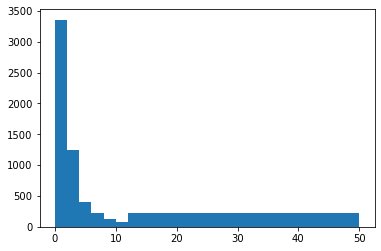

In [197]:
#ploting word freq in a hist to see wich words 
list_frequency = [] 
for index in range(len(corpus)):
        list_frequency.append(corpus[index][1])

plt.hist(list_frequency, bins=[0, 2, 4, 6, 8, 10, 12,50]);

In [147]:
corpus = [tup for tup in corpus if tup[1] > 4]

In [148]:
len(corpus)

819

In [149]:
corpus

[('tesla', 153),
 ('would', 103),
 ('good', 102),
 ('twitter', 100),
 ('people', 100),
 ('yes', 83),
 ('much', 81),
 ('starlink', 80),
 ('one', 76),
 ('true', 75),
 ('many', 69),
 ('like', 68),
 ('even', 67),
 ('great', 66),
 ('time', 62),
 ('also', 61),
 ('yeah', 55),
 ('exactly', 55),
 ('spacex', 52),
 ('next', 52),
 ('make', 52),
 ('year', 51),
 ('think', 51),
 ('still', 50),
 ('haha', 50),
 ('maybe', 49),
 ('high', 48),
 ('probably', 45),
 ('team', 44),
 ('year', 43),
 ('work', 43),
 ('far', 43),
 ('earth', 42),
 ('right', 41),
 ('car', 41),
 ('lot', 40),
 ('day', 40),
 ('way', 38),
 ('russia', 38),
 ('real', 38),
 ('life', 38),
 ('better', 38),
 ('world', 37),
 ('ukraine', 35),
 ('get', 34),
 ('beta', 34),
 ('actually', 34),
 ('time', 33),
 ('long', 33),
 ('orbit', 32),
 ('future', 32),
 ('working', 31),
 ('first', 31),
 ('best', 31),
 ('need', 30),
 ('know', 30),
 ('big', 30),
 ('almost', 30),
 ('ok', 29),
 ('hard', 29),
 ('fsd', 29),
 ('yup', 28),
 ('well', 28),
 ('starship', 28

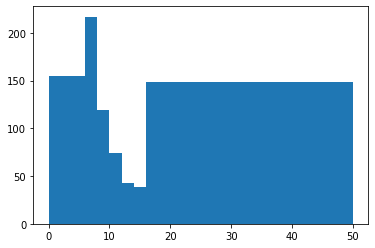

In [151]:
list_frequency = [] 
for index in range(len(corpus)):
        list_frequency.append(corpus[index][1])

plt.hist(list_frequency, bins=[0, 6, 8, 10, 12, 14, 16,50]);